In [105]:
### Import libraries ----
import pandas as pd
import numpy as np
import sklearn.linear_model as linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
### Generate data ----
!Python 1_Get_UCDP.py

In [37]:
### Load data ----
df_ucdp = pd.read_csv('ucdp_month.csv')
df_ucdp = df_ucdp.set_index("date")
df_ucdp.head(5)

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uzbekistan,Venezuela,Yemen (North Yemen),Zambia,Zimbabwe (Rhodesia)
date,,,,,,,,,,,,,,,,,,,,,
1989-01,1298.788462,0,0.0,300.273810,0,0.0,0,0,0.0,0,...,0.000000,0.0,0,3.0,0,0.0,0.000000,0.0,0.0,0.0
1989-02,198.715385,0,0.0,427.809524,0,0.0,0,0,0.0,0,...,0.000000,0.0,0,5.0,0,0.0,21.897727,0.0,0.0,0.0
1989-03,2211.050962,0,0.0,415.261905,0,0.0,0,0,0.0,0,...,0.000000,0.0,0,5.0,0,0.0,22.505682,0.0,0.0,10.5
1989-04,510.730769,0,0.0,177.857143,0,0.0,0,0,0.0,0,...,97.333333,0.0,0,0.0,0,0.0,0.000000,0.0,0.0,0.0
1989-05,821.833544,0,0.0,278.592437,0,0.0,0,0,0.0,0,...,593.126667,0.0,0,1.0,0,0.0,0.000000,0.0,4.0,0.0
1989-06,903.935687,0,0.0,61.882353,0,0.0,0,0,0.0,0,...,364.866667,0.0,0,2.0,0,0.0,0.000000,0.0,0.0,0.0
1989-07,880.250210,0,0.0,0.000000,0,0.0,0,0,0.0,0,...,0.000000,0.0,0,2.0,0,0.0,1.062500,0.0,0.0,10.5
1989-08,365.916877,0,0.0,346.047619,0,0.0,0,0,0.0,0,...,0.000000,0.0,0,1.0,0,0.0,0.000000,0.0,0.0,0.0
1989-09,185.730769,0,0.0,565.395238,0,0.0,0,0,0.0,0,...,0.000000,0.0,0,13.0,0,0.0,0.000000,0.0,0.0,0.0


In [150]:
### Check countries with high low fatalities -----
pd.DataFrame(df_ucdp.sum(axis=0)).sort_values(by=0).head(10)

,0
Botswana,1.0
United Arab Emirates,1.0
Benin,1.0
Netherlands,2.0
Australia,2.0
Solomon Islands,2.0
Austria,4.0
Bhutan,4.0
Sweden,5.0
Albania,6.0


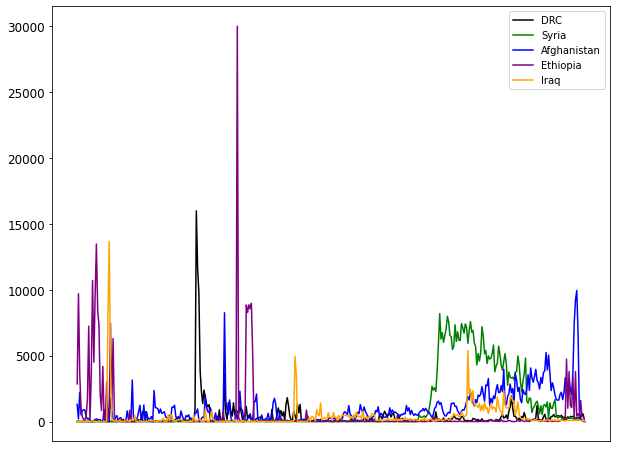

In [82]:
### Make summary plot -- High fatality countries -----
fig = plt.figure(figsize=(10,8))
plt.plot(df_ucdp["DR Congo (Zaire)"], color="black", linestyle="solid", label="DRC")
plt.plot(df_ucdp["Syria"], color="green", linestyle="solid", label="Syria")
plt.plot(df_ucdp["Afghanistan"], color="blue", linestyle="solid", label="Afghanistan")
plt.plot(df_ucdp["Ethiopia"], color="purple", linestyle="solid", label="Ethiopia")
plt.plot(df_ucdp["Iraq"], color="orange", linestyle="solid", label="Iraq")

# Remove xticks
# Source: https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
plt.xticks([], [])
plt.yticks(size=12)
plt.legend()

# Save
plt.savefig(f"summary_high.png",
            bbox_inches="tight",
            dpi=200)

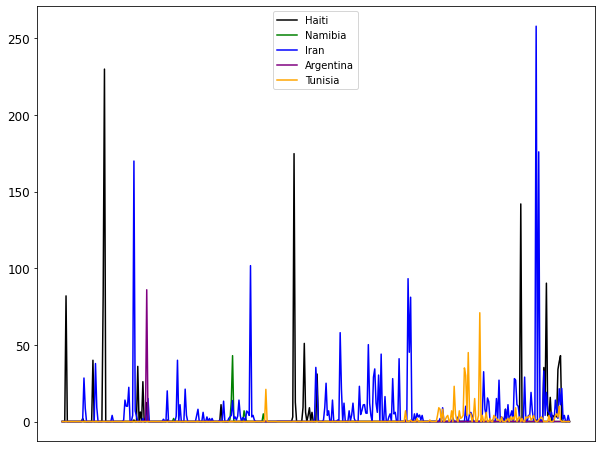

In [89]:
### Make summary plot -- Low fatality countries -----
fig = plt.figure(figsize=(10,8))
plt.plot(df_ucdp["Haiti"], color="black", linestyle="solid", label="Haiti")
plt.plot(df_ucdp["Namibia"], color="green", linestyle="solid", label="Namibia")
plt.plot(df_ucdp["Iran"], color="blue", linestyle="solid", label="Iran")
plt.plot(df_ucdp["Argentina"], color="purple", linestyle="solid", label="Argentina")
plt.plot(df_ucdp["Tunisia"], color="orange", linestyle="solid", label="Tunisia")

# Remove xticks
# Source: https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
plt.xticks([], [])
plt.yticks(size=12)
plt.legend()

# Save
plt.savefig(f"summary_low.png",
            bbox_inches="tight",
            dpi=200)

In [11]:
### Prepare data -----
tr_test_split=0.8    # 80% train - 20% test
number_s=11          # 10 months sequences

# Normalization
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df_ucdp))

# Creation of the sequences
ts_seq=[]
for col in range(len(df.columns)):
    for i in range(number_s-1,len(df)):
        ts_seq.append(df.iloc[i-number_s+1:i+1,col])
        
# Creation of trainset and testet
ts_seq=np.array(ts_seq)
ts_seq_l= ts_seq.reshape(len(df.columns),len(df.index)-number_s+1,number_s)
ts_seq_learn=ts_seq_l[:,:int(tr_test_split*len(df)),:]
ts_seq_learn=ts_seq_learn.reshape(ts_seq_learn.shape[0]*ts_seq_learn.shape[1],number_s)
ts_seq_test=ts_seq_l[:,int(tr_test_split*len(df)):,:]
ts_seq_test=ts_seq_test.reshape(ts_seq_test.shape[0]*ts_seq_test.shape[1],number_s)
# Creation of input/output for each set
train_x = ts_seq_learn[:,:-1]
train_y = ts_seq_learn[:,-1]
test_x = ts_seq_test[:,:-1]
test_y = ts_seq_test[:,-1]

In [152]:
# Hyperparameter tuning -----

tuning = pd.DataFrame(columns=["alpha", "mean_mse", "std_mse"])

for a in [0.1, 2, 3, 5, 10, 50, 200, 1000]:
    model = linear_model.Lasso(max_iter=2000,alpha=1/(2*a))
    cv_results = cross_val_score(model, train_x, train_y, cv=5, scoring='neg_mean_squared_error')
    
    # Save results
    para = pd.DataFrame({"alpha": a,
                         "mean_mse": cv_results.mean(), 
                         "std_mse": cv_results.std()},
                         index=[a])
    tuning = tuning.append(para)
    tuning.reset_index(drop=True, inplace=True)

tuning

,alpha,mean_mse,std_mse
0,0.1,-0.008955,0.002634
1,2.0,-0.008955,0.002634
2,3.0,-0.008955,0.002634
3,5.0,-0.008955,0.002634
4,10.0,-0.008955,0.002634
5,50.0,-0.008955,0.002634
6,200.0,-0.006730,0.001892
7,1000.0,-0.005375,0.001028


In [149]:
### Final model -----
model = linear_model.Lasso(max_iter=2000,alpha=10000).fit(train_x, train_y)
pred = model.predict(test_x)
mse = mean_squared_error(test_y,pred)
print(mse)
weighted_mse =  mean_squared_error(test_y,pred,sample_weight=test_y+1)
print(weighted_mse)

0.010551452177382643
0.016725269743711968
